In [1]:
import spacy
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import re
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import json

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from analysis_code.analyze_corpus import *

In [10]:
# directory = '/home/luluvyd/examples/data/'
# filename = '/home/luluvyd/examples/data/MovieSummary_example.txt'


In [5]:
nlp = spacy.load('en_core_web_md')
emos = loadEmotionWords('/home/luluvyd/corpus/NRC-Emotion-Lexicon-v0.92/Generated-EmotionWords.txt')

i : 0
i : 1
i : 2


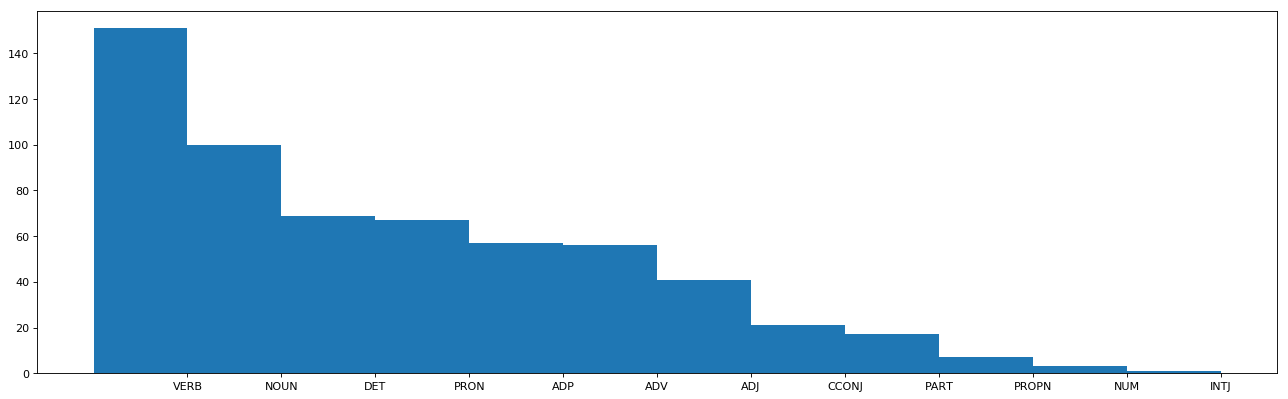

In [3]:
'''
POS histogram
error: doc input string cannot succeed 1 million characters
problem: iterating over text is too slow, parallelize
'''
read_files = glob.glob(directory + '*.txt')

counter = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counter = analyzePOS(doc)
        i += 1
        
        
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counter)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

i : 0
SENTENCE : 23890098	
SENTENCE : Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all.

SENTENCE : 31186339	
SENTENCE : The nation of Panem consists of a wealthy Capitol and twelve poorer districts.
SENTENCE : As punishment for a past rebellion, each district must provide a boy and girl  between the ages of 12 and 18 selected by lottery  for the annual Hunger Games.
SENTENCE : The tributes must fight to the death in an arena; the sole survivor is rewarded with fame and wealth.
SENTENCE : In her first Reaping, 12-year-old Primrose Everdeen is chosen from District 12.
SENTENCE : Her older sister Katniss volunteers to take her place.
SENTENCE : Peeta Mellark, a baker's son who once gave Katniss bread when she was starving, is the other District 12 tribute.
SENTENCE : Katniss and Peeta are taken to the Capitol, accompanied by their frequently drunk mentor, past 

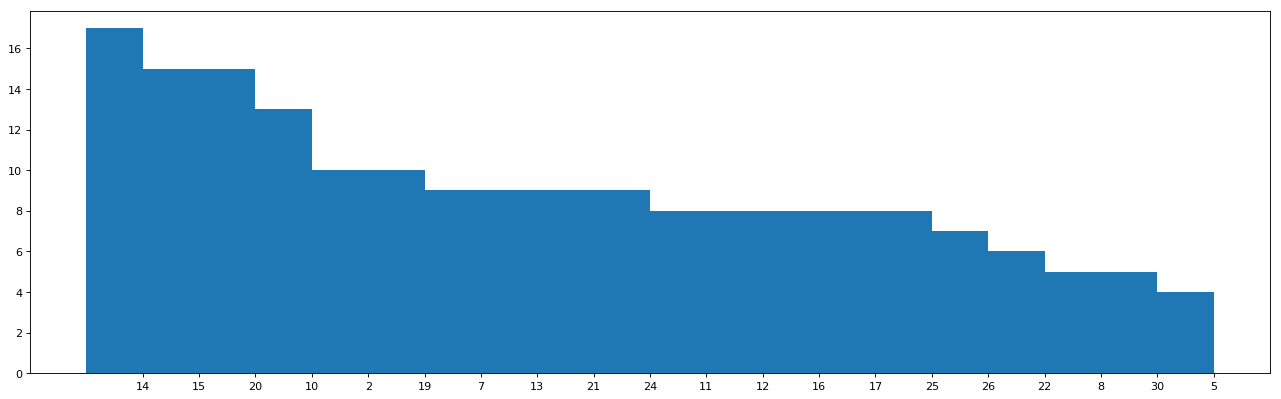

In [4]:
'''
Sentence length histogram
error: doc input string cannot succeed 1 million characters
problem: non-edited opinion text can have long and publish unaccepted sentence structures
'''

# read_files = glob.glob("/home/luluvyd/corpus/aclImdb/train/pos/*.txt")
read_files = glob.glob(directory + '*.txt')

counter = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counter += analyzeSentence(doc) 
        i += 1
        
        
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counter)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

i : 0
Counter({'love': 17412, 'mother': 15435, 'friend': 10833, 'leave': 9086, 'escape': 7994, 'gang': 5550, 'marry': 4743, 'good': 4681, 'calls': 4501, 'shot': 4432, 'including': 4225, 'save': 4106, 'officer': 3904, 'black': 3743, 'lost': 3735, 'doctor': 3730, 'fall': 3709, 'rest': 3350, 'case': 3348, 'sex': 3310, 'frank': 2906, 'force': 2892, 'rescue': 2756, 'happy': 2734, 'truth': 2723, 'late': 2704, 'leader': 2686, 'land': 2681, 'accident': 2653, 'join': 2511, 'deal': 2455, 'dance': 2432, 'chase': 2367, 'pay': 2359, 'star': 2347, 'continue': 2325, 'hit': 2311, 'full': 2305, 'shoot': 2229, 'evil': 2172, 'die': 2146, 'present': 2068, 'bad': 1910, 'information': 1890, 'bomb': 1882, 'partner': 1828, 'female': 1803, 'god': 1759, 'master': 1757, 'don': 1750, 'interest': 1744, 'sea': 1733, 'director': 1705, 'main': 1698, 'wrong': 1683, 'hidden': 1673, 'monster': 1666, 'public': 1638, 'guard': 1629, 'broken': 1621, 'lord': 1591, 'falling': 1570, 'share': 1551, 'special': 1528, 'famous': 15

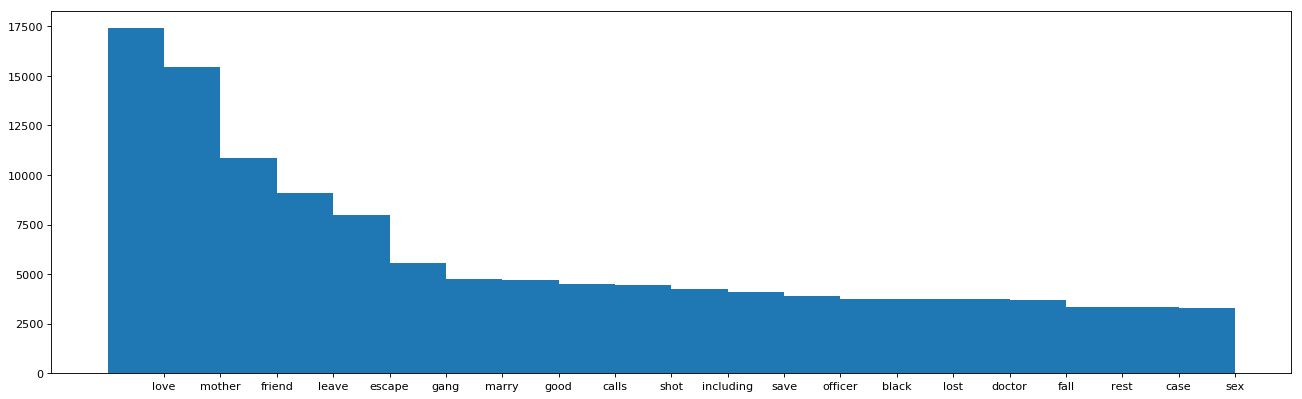

In [12]:
'''
Emotion words histogram
'''
directory = '/home/luluvyd/corpus/MovieSummaries/MovieSummaries-break/'
read_files = glob.glob(directory + '*.txt')

counterEmos = Counter('')
i = 0

for infile in read_files:
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterEmos += analyzeEmotionWords(doc, emos) 
        print('i : ' + str(i))  
        i += 1
    
print(counterEmos)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterEmos)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
print(counterEmos)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterEmos)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
analyzeVerbs

'''
Emotion words histogram
'''
directory = '/home/luluvyd/corpus/MovieSummaries/MovieSummaries-break/'
read_files = glob.glob(directory + '*.txt')

counterEmos = Counter('')
i = 0

for infile in read_files:
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterEmos += analyzeEmotionWords(doc, emos) 
        print('i : ' + str(i))  
        i += 1
    
print(counterEmos)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterEmos)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()